# Support Vector Machine Lesson 82 Part1 

In [1]:
# SVM:  patter recognition used for both classification and regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from pandas import Series, DataFrame

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
'''
Now we are going to import Support Vector Classification from scikit learn. 
'''

from sklearn.svm import SVC
model = SVC()


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y)
model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
from sklearn import metrics

In [8]:
predicted = model.predict(X_test)
expected = Y_test

print(metrics.accuracy_score(expected, predicted))

0.9736842105263158


# now we will explore various kernal types for classification using SVC() 

In [9]:
#  First SVC(kernel) = linear   1. Gaussian and  2. Polynomial third degree  (hinge loss)

In [10]:
from sklearn import svm

X = iris.data[:,:2]
Y = iris.target
C = 1.0   # This is for regularization btween kernel methods. 


In [11]:
svc = svm.SVC(kernel = 'linear', C=C)
svc.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
rbf_svc = svm.SVC(kernel = 'rbf', gamma = 0.7, C = C).fit(X,Y)

In [13]:
poly_svc = svm.SVC(kernel = 'poly', degree = 3, C=C).fit(X,Y)

In [14]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

c:\users\dicei\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
h = 0.02 # set stepsize 
x_min = X[:,0].min()-1  # column = 0 min
x_max = X[:,0].max()+1  # column =0 max

y_min = X[:,1].min()-1 # column = 1 min
y_max = X[:,1].max()+1 # column = 1 max

xx, yy = np.meshgrid(np.arange(x_min, x_max,h),np.arange(y_min, y_max, h))

titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

c:\users\dicei\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)
c:\users\dicei\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)
c:\users\dicei\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)
c:\users\dicei\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


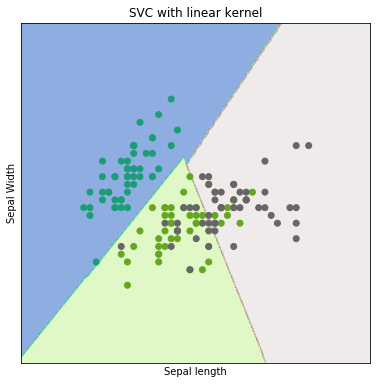

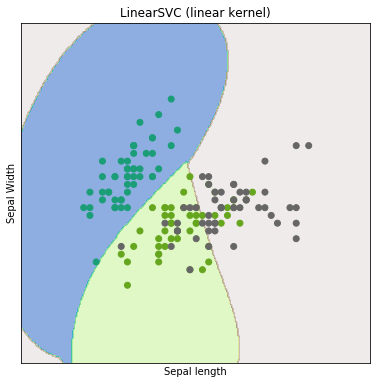

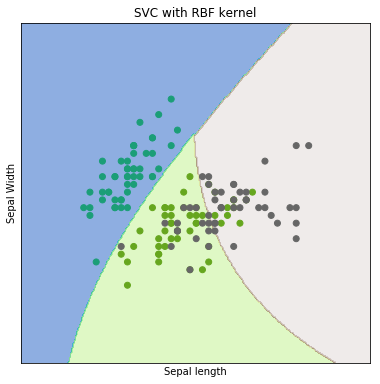

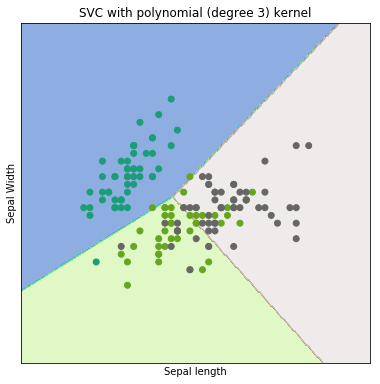

In [23]:
for i, clf in enumerate((svc,rbf_svc,poly_svc, lin_svc)):
    plt.figure(figsize = (15,15))
    plt.subplot(2,2, i+1)
    plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy, Z, cmap = plt.cm.terrain,alpha = 0.5,linewidth = 0)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap = plt.cm.Dark2)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    
    
    